In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import random
import torch

# Set a random seed for reproducibility
random.seed(42)
torch.manual_seed(42)


# Define the network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)  # Assuming 2 classes: deadlift and non-deadlift
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Resize((128, 128))
])

# Load the dataset
#dataset = torchvision.datasets.ImageFolder('/Users/rotemcohen/FitnessAI/CNN - Accuracy/deadlift', transform=transform)
dataset = torchvision.datasets.ImageFolder(r'C:\Users\mosac\Git Repositories\FitnessAI\fitnessai_app\models\data\Deadlift', transform=transform)

# Split the dataset into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Define the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Create an instance of the network model
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Adjust the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 10 == 9:  # Print the loss every 10 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Training finished.')

# Evaluate the model on the test set
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on the test set: %.2f %%' % (100 * correct / total))


Training finished.
Accuracy on the test set: 76.76 %


## Save the trained model in a pickle file ##

In [38]:
import pickle

# save its weights

# Save the state_dict of the model
weights = model.state_dict()

# Specify the file path where saved the weights
file_path = r'C:\Users\mosac\Git Repositories\FitnessAI\fitnessai_app\models\data\Deadlift\model_weights.pickle'

# Open the file in binary mode and save the weights using pickle
with open(file_path, 'wb') as file:
    pickle.dump(weights, file)

print("Weights saved successfully!")

Weights saved successfully!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


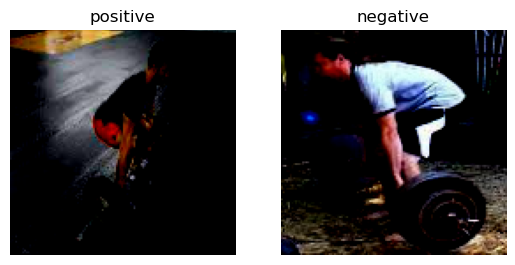

Epoch [1/10], Loss: 0.6920
Epoch [2/10], Loss: 0.6701
Epoch [3/10], Loss: 0.4936
Epoch [4/10], Loss: 0.4229
Epoch [5/10], Loss: 0.1452
Epoch [6/10], Loss: 0.0621
Epoch [7/10], Loss: 0.0804
Epoch [8/10], Loss: 0.0380
Epoch [9/10], Loss: 0.0015
Epoch [10/10], Loss: 0.0007


In [37]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # Assuming 2 classes: deadlift and non-deadlift
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Resize((128, 128))
])

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image, label = self.data[idx]
        return image, label

# Set the path to your data directory
train_data_dir = 'C:/Users/mosac/Git Repositories/FitnessAI/fitnessai_app/models/data/Deadlift'

# Create the dataset
train_dataset = CustomDataset(train_data_dir, transform=transform)


# Get class names and indices
class_names = train_dataset.data.classes
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Get an example image from each class
example_images = []
for class_name in class_names:
    class_samples = [i for i, label in enumerate(train_dataset.data.targets) if label == class_indices[class_name]]
    example_idx = class_samples[0]
    example_image, _ = train_dataset[example_idx]
    example_images.append(example_image)

# Visualize example images from each class
fig, axs = plt.subplots(1, len(class_names))
for i, ax in enumerate(axs):
    ax.imshow(example_images[i-1].permute(1, 2, 0))
    ax.set_title(class_names[i-1])
    ax.axis('off')
plt.show()


# Create the data loader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Set the number of epochs
num_epochs = 10

# Example usage of the data loader
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


In [39]:
import pickle

# save its weights

# Save the state_dict of the model
weights = model.state_dict()

# Specify the file path where saved the weights
file_path = r'C:\Users\mosac\Git Repositories\FitnessAI\fitnessai_app\models\data\Deadlift\model_weights.pickle'

# Open the file in binary mode and save the weights using pickle
with open(file_path, 'wb') as file:
    pickle.dump(weights, file)

print("Weights saved successfully!")

Weights saved successfully!
